# Projet GGVIE : Détection de moments clés d'une entreprise

## Import des librairies

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Pour afficher toutes les colonnes et lignes
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Lecture des données

In [145]:
# Stock etablissement historique
stock_etablissement_hist = pd.read_csv("../data_Projet_GGVie/StockEtablissementHistorique_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement_hist = pd.DataFrame(stock_etablissement_hist.get_chunk(1000000))

# Stock etablissement
stock_etablissement = pd.read_csv("../data_Projet_GGVie/StockEtablissement_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement = pd.DataFrame(stock_etablissement.get_chunk(1000000))

# Stock etablissement lien succession
stock_etablissement_lien_succession = pd.read_csv("../data_Projet_GGVie/StockEtablissementLiensSuccession_utf8.csv", chunksize=1000000, low_memory=False)
stock_etablissement_lien_succession = pd.DataFrame(stock_etablissement_lien_succession.get_chunk(1000000))

# Stock unite legale
stock_unite_legale = pd.read_csv("../data_Projet_GGVie/StockUniteLegale_utf8.csv", chunksize=1000000, low_memory=False)
stock_unite_legale = pd.DataFrame(stock_unite_legale.get_chunk(1000000))

# Stock unite legale historique
stock_unite_legale_hist = pd.read_csv("../data_Projet_GGVie/StockUniteLegaleHistorique_utf8.csv", chunksize=1000000, low_memory=False)
stock_unite_legale_hist = pd.DataFrame(stock_unite_legale_hist.get_chunk(1000000))

"""# Infogreffe 2022
infogreffe_2022 = pd.read_csv("../data_Projet_GGVie/chiffres-cles-2022.csv", chunksize=1000000,low_memory=False)
infogreffe_2022 = pd.DataFrame(infogreffe_2022.get_chunk(1000000))"""

'# Infogreffe 2022\ninfogreffe_2022 = pd.read_csv("../data_Projet_GGVie/chiffres-cles-2022.csv", chunksize=1000000,low_memory=False)\ninfogreffe_2022 = pd.DataFrame(infogreffe_2022.get_chunk(1000000))'

## Exploration des données

In [146]:
df = stock_etablissement.copy()

In [148]:
df.head(100)

,siren,nic,siret,statutDiffusionEtablissement,dateCreationEtablissement,trancheEffectifsEtablissement,anneeEffectifsEtablissement,activitePrincipaleRegistreMetiersEtablissement,dateDernierTraitementEtablissement,etablissementSiege,nombrePeriodesEtablissement,complementAdresseEtablissement,numeroVoieEtablissement,indiceRepetitionEtablissement,typeVoieEtablissement,libelleVoieEtablissement,codePostalEtablissement,libelleCommuneEtablissement,libelleCommuneEtrangerEtablissement,distributionSpecialeEtablissement,codeCommuneEtablissement,codeCedexEtablissement,libelleCedexEtablissement,codePaysEtrangerEtablissement,libellePaysEtrangerEtablissement,complementAdresse2Etablissement,numeroVoie2Etablissement,indiceRepetition2Etablissement,typeVoie2Etablissement,libelleVoie2Etablissement,codePostal2Etablissement,libelleCommune2Etablissement,libelleCommuneEtranger2Etablissement,distributionSpeciale2Etablissement,codeCommune2Etablissement,codeCedex2Etablissement,libelleCedex2Etablissement,codePaysEtranger2Etablissement,libellePaysEtranger2Etablissement,dateDebut,etatAdministratifEtablissement,enseigne1Etablissement,enseigne2Etablissement,enseigne3Etablissement,denominationUsuelleEtablissement,activitePrincipaleEtablissement,nomenclatureActivitePrincipaleEtablissement,caractereEmployeurEtablissement
0,325175,16,32517500016,O,2000-09-26,NaN,NaN,3212ZZ,2015-03-18T00:58:59,False,3,NaN,NaN,NaN,NaN,MANIHI COTE MONTAGNE TUAMOTU,98770.0,MANIHI,NaN,NaN,98727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-05-27,F,NaN,NaN,NaN,NaN,32.12Z,NAFRev2,N
1,325175,24,32517500024,O,2008-05-20,NaN,NaN,NaN,2011-12-12T09:40:04,False,2,NaN,1,NaN,PL,LEONCE DE SEYNES,84140.0,AVIGNON,NaN,NaN,84007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-21,F,TAHITI PERLES CREATIONS,NaN,NaN,NaN,47.89Z,NAFRev2,N
2,325175,32,32517500032,O,2009-05-27,NaN,NaN,NaN,2014-07-08T00:10:21,False,2,ECONOMIS,6,NaN,AV,FRANCOIS MAURIAC,84000.0,AVIGNON,NaN,NaN,84007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-21,F,TAHITI PERLES CREATIONS,NaN,NaN,NaN,32.12Z,NAFRev2,N
3,325175,40,32517500040,O,2011-10-21,NaN,NaN,3212ZZ,2015-03-18T00:58:59,False,2,NaN,170,NaN,AV,DU COL DE L ANGE,13420.0,GEMENOS,NaN,NaN,13042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-07,F,TAHITI PERLES CREATION,NaN,NaN,NaN,32.12Z,NAFRev2,N
4,325175,57,32517500057,O,2014-01-07,NaN,NaN,NaN,2018-07-10T14:17:15,False,2,NaN,61,NaN,RUE,MARX DORMOY,13004.0,MARSEILLE 4,NaN,NaN,13204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-07,F,TAHITI PERLES CREATION,NaN,NaN,NaN,32.12Z,NAFRev2,N
5,325175,65,32517500065,O,2018-02-07,NaN,NaN,NaN,2019-12-13T13:21:28,True,1,NaN,51,NaN,RUE,MARX DORMOY,13004.0,MARSEILLE 4,NaN,NaN,13204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-07,A,NaN,NaN,NaN,NaN,32.12Z,NAFRev2,N
6,1807254,14,180725400014,O,1972-05-01,NaN,NaN,NaN,2009-10-02T11:01:38,False,2,NaN,15,NaN,RUE,D INGLEMUR,54200.0,TOUL,NaN,NaN,54528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978-05-31,F,NaN,NaN,NaN,NaN,NaN,NaN,N
7,1807254,22,180725400022,O,2009-10-01,NaN,NaN,NaN,2019-11-14T14:00:13,True,2,NaN,31,NaN,RUE,D ALEMBERT,2100.0,SAINT-QUENTIN,NaN,NaN,02691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-31,F,NaN,NaN,NaN,NaN,85.59A,NAFRev2,N
8,5410220,15,541022000015,O,NaN,NN,NaN,NaN,2019-11-14T14:01:01,True,1,NaN,NaN,NaN,RUE,DE HOUDENT,80210.0,TOURS-EN-VIMEU,NaN,NaN,80765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988-03-31,F,NaN,NaN,NaN,NaN,22.02,NAP,N
9,5410345,10,541034500010,O,NaN,NaN,NaN,NaN,NaN,True,1,NaN,NaN,NaN,RTE,DE DOULLENS,80100.0,ABBEVILLE,NaN,NaN,80001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984-12-25,F,NaN,NaN,NaN,NaN,79.06,NAP,N


In [147]:
df.shape

(1000000, 48)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394710 entries, 0 to 394709
Data columns (total 54 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   siren                                           394710 non-null  int64  
 1   nic                                             394710 non-null  int64  
 2   siret                                           394710 non-null  int64  
 3   statutDiffusionEtablissement                    394710 non-null  object 
 4   dateCreationEtablissement                       321929 non-null  object 
 5   trancheEffectifsEtablissement                   287856 non-null  object 
 6   anneeEffectifsEtablissement                     105454 non-null  float64
 7   activitePrincipaleRegistreMetiersEtablissement  3378 non-null    object 
 8   dateDernierTraitementEtablissement              317674 non-null  object 
 9   etablissementSiege        

In [160]:
df.describe()

,siren,nic,siret,nombrePeriodesEtablissement
count,7.431120e+05,743112.000000,7.431120e+05,743112.000000
mean,2.172262e+08,248.215505,2.172262e+13,2.918878
std,9.097328e+07,1756.001193,9.097328e+12,1.343148
min,5.410220e+06,10.000000,5.410220e+11,1.000000
25%,1.944008e+08,15.000000,1.944008e+13,2.000000
50%,2.218000e+08,21.000000,2.218000e+13,3.000000
75%,3.010995e+08,46.000000,3.010995e+13,4.000000
max,3.051480e+08,54682.000000,3.051480e+13,30.000000


## Nettoyage des données

### Suppression des colonnes inutiles

In [155]:
missing_rate = df.isnull().sum()/df.shape[0]
missing_rate.sort_values(ascending=False)

dateDernierTraitementEtablissement             0.178203
dateCreationEtablissement                      0.161155
dateDebut                                      0.049325
caractereEmployeurEtablissement                0.010426
nomenclatureActivitePrincipaleEtablissement    0.005543
activitePrincipaleEtablissement                0.005543
codeCommuneEtablissement                       0.000731
etatAdministratifEtablissement                 0.000000
nombrePeriodesEtablissement                    0.000000
etablissementSiege                             0.000000
trancheEffectifsEtablissement                  0.000000
siret                                          0.000000
nic                                            0.000000
siren                                          0.000000
dtype: float64

In [150]:
threshold = len(df) * 0.5
df.dropna(axis=1, thresh=threshold, inplace=True)

On choisit de supprimer les colonnes avec plus de 50% de valeurs manquantes (et les colonnes "changements" qui sont liés ?).

In [152]:
df = df.drop(columns=['numeroVoieEtablissement','typeVoieEtablissement','libelleVoieEtablissement','libelleCommuneEtablissement','codePostalEtablissement','statutDiffusionEtablissement'])

In [135]:
# Compte le pourcentage de valeur d'une colonne
df['trancheEffectifsEtablissement'].value_counts(normalize=True) * 100

99    63.365711
1     13.087447
2      5.959230
3      4.349744
11     4.148602
12     3.589989
21     2.714552
22     1.140848
0      0.842435
32     0.344617
31     0.201837
41     0.151117
42     0.064268
51     0.033350
52     0.004864
53     0.001390
Name: trancheEffectifsEtablissement, dtype: float64

### Suppression des lignes inutiles

In [154]:
df = df.dropna(subset = ['trancheEffectifsEtablissement'])

### Transformation des données

#### En datetime

In [156]:
df['dateDebut'] = pd.to_datetime(df['dateDebut'])
df['dateDernierTraitementEtablissement'] = pd.to_datetime(df['dateDernierTraitementEtablissement'])
df['dateCreationEtablissement'] = pd.to_datetime(df['dateCreationEtablissement'])

#### En entier

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743112 entries, 8 to 999998
Data columns (total 14 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   siren                                        743112 non-null  int64         
 1   nic                                          743112 non-null  int64         
 2   siret                                        743112 non-null  int64         
 3   dateCreationEtablissement                    623356 non-null  datetime64[ns]
 4   trancheEffectifsEtablissement                743112 non-null  object        
 5   dateDernierTraitementEtablissement           610687 non-null  datetime64[ns]
 6   etablissementSiege                           743112 non-null  bool          
 7   nombrePeriodesEtablissement                  743112 non-null  int64         
 8   codeCommuneEtablissement                     742569 non-null  ob

## Analyse des données

In [158]:
df = df.sort_values(by=['dateCreationEtablissement'])

In [178]:
df = df[df['dateCreationEtablissement'].dt.year >= 1955]

### Nombre d'entreprises créées par an à partir de 1955

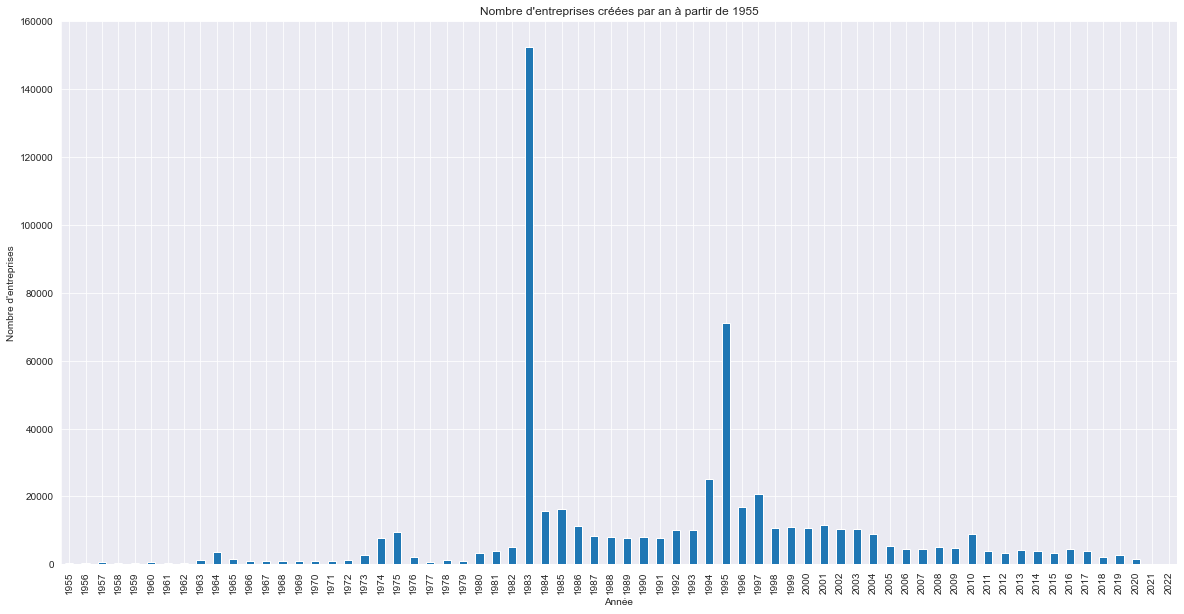

In [181]:
df['dateCreationEtablissement'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(20,10))
plt.title('Nombre d\'entreprises créées par an à partir de 1955')
plt.xlabel('Année')
plt.ylabel('Nombre d\'entreprises')
plt.show()

### Répartition des entreprises par tranche d'effectifs

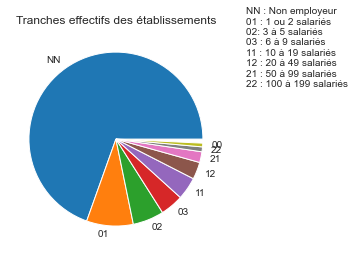

In [213]:
seuil_angle = 2
s = df['trancheEffectifsEtablissement'].value_counts(normalize=True)
angles = s * 360
indices = angles > seuil_angle
valeurs = s[indices]
plt.pie(valeurs, labels=valeurs.index)
plt.title('Tranches effectifs des établissements')
#plt.legend(loc='upper right')
plt.text(1.5, 0.6, 'NN : Non employeur\n01 : 1 ou 2 salariés\n02: 3 à 5 salariés\n03 : 6 à 9 salariés\n11 : 10 à 19 salariés\n12 : 20 à 49 salariés\n21 : 50 à 99 salariés\n22 : 100 à 199 salariés')
plt.show()

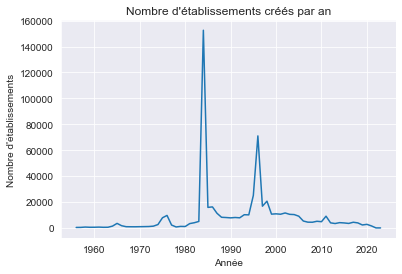

In [219]:
df1 = df.set_index('dateCreationEtablissement')

# Agréger les données par année
df_an = df1.resample('A').count()

# Tracer un graphique montrant l'évolution du nombre d'établissements par année
plt.plot(df_an.index, df_an['siret'])
plt.xlabel('Année')
plt.ylabel('Nombre d\'établissements')
plt.title('Nombre d\'établissements créés par an')
plt.show()